In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [66]:
loanData = pd.read_csv('loanCSV.csv')
loanData.head()

,Customer ID,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Postcode,Income,Own home,CCJs,Loan amount,Outcome
0,945780,Miah,19,F,2,Unemployed,UK,0,TA3 7SH,45500,Rent,1,13234,Paid
1,747989,Hollis,66,F,13,Unemployed,UK,1080,WV6 8SU,18000,Own,0,5561,Paid
2,790344,Barker,48,F,4,Self Employed,UK,3690,BT15 5HG,47500,Rent,1,28288,Paid
3,597668,Titford,67,F,47,Self Employed,UK,6560,GU10 3NH,36000,Mortgage,0,30199,Paid
4,794971,Berry,70,M,8,Self Employed,UK,9100,GL6 6UB,50500,Own,0,35078,Paid


In [67]:
loanOG = loanData.copy()

In [68]:
loanData.columns

Index(['Customer ID', 'Fictional Surname', 'Age', 'Gender', 'Years at address',
       'Employment status', 'Country', 'Current debt', 'Postcode', 'Income',
       'Own home', 'CCJs', 'Loan amount', 'Outcome'],
      dtype='object')

In [69]:
loanData.dtypes

Customer ID           int64
Fictional Surname    object
Age                   int64
Gender               object
Years at address      int64
Employment status    object
Country              object
Current debt          int64
Postcode             object
Income                int64
Own home             object
CCJs                  int64
Loan amount           int64
Outcome              object
dtype: object

In [70]:
loanData.shape

(2000, 14)

In [71]:
loanData['Outcome'].value_counts()

Paid         1118
Defaulted     882
Name: Outcome, dtype: int64

In [72]:
loanData['Outcome'].value_counts(normalize = True)

Paid         0.559
Defaulted    0.441
Name: Outcome, dtype: float64

<AxesSubplot:>

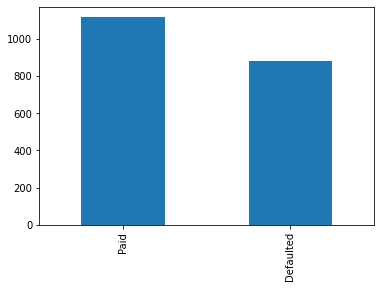

In [73]:
loanData['Outcome'].value_counts().plot.bar()

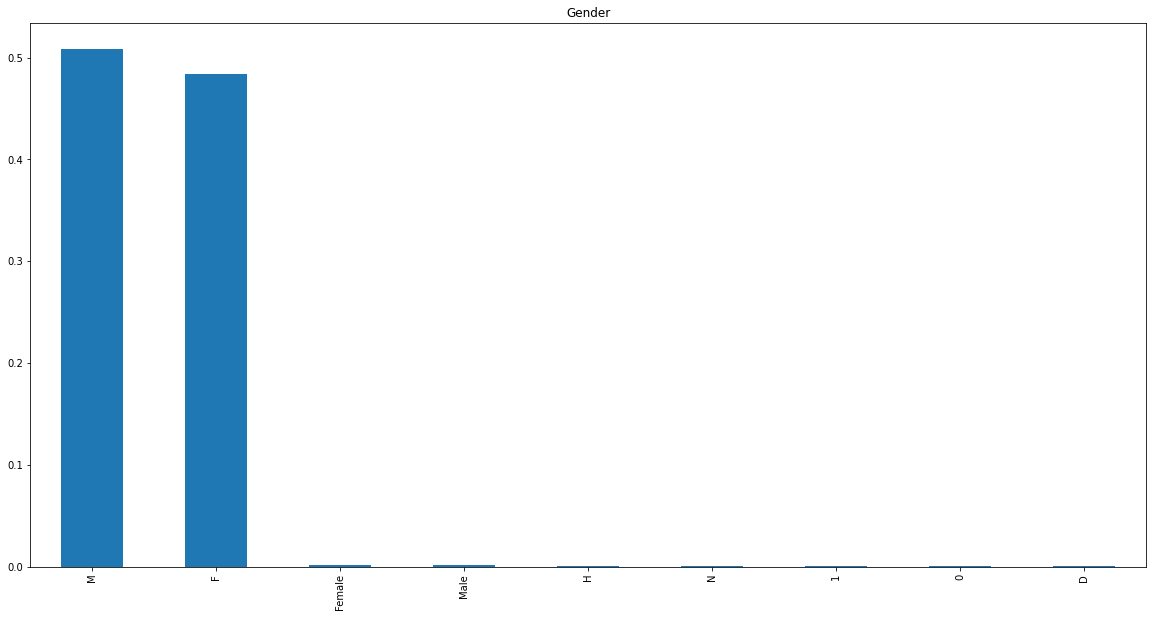

In [74]:
loanData['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.show()

In [75]:
loanData['Gender'].value_counts()

M         1017
F          968
Female       4
Male         3
H            2
N            2
1            2
0            1
D            1
Name: Gender, dtype: int64

In [76]:
print(1017+968+4+3)
len(loanData)

1992


2000

In [77]:
loanData['Gender'].replace("Male","M", inplace = True)
loanData['Gender'].replace("Female", "F", inplace = True)   

loanData['Gender'].value_counts()        

M    1020
F     972
H       2
N       2
1       2
0       1
D       1
Name: Gender, dtype: int64

In [78]:
loanData.where(loanData['Gender']=='H').dropna()

,Customer ID,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Postcode,Income,Own home,CCJs,Loan amount,Outcome
325,611927.0,Irish,68.0,H,6.0,Unemployed,UK,5340.0,W14 0AJ,31000.0,Rent,2.0,21572.0,Defaulted
511,953789.0,Feller,33.0,H,4.0,Employed,UK,4970.0,CV36 5HS,29500.0,Own,3.0,10010.0,Defaulted


In [79]:
loanData.where(loanData['Gender']=='N').dropna()

,Customer ID,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Postcode,Income,Own home,CCJs,Loan amount,Outcome
1247,661346.0,Penfold,20.0,N,2.0,Self Employed,UK,1970.0,NW6 3DG,43500.0,Mortgage,0.0,21577.0,Defaulted
1422,1108579.0,Oliver,60.0,N,25.0,Self Employed,UK,2750.0,LS29 8QA,32000.0,Mortgage,0.0,31577.0,Paid


In [80]:
loanData.where(loanData['Gender']=='0').dropna()

,Customer ID,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Postcode,Income,Own home,CCJs,Loan amount,Outcome
1779,886717.0,Judice,39.0,0,18.0,Self Employed,UK,4790.0,ME13 0BL,51500.0,Mortgage,3.0,1640.0,Defaulted


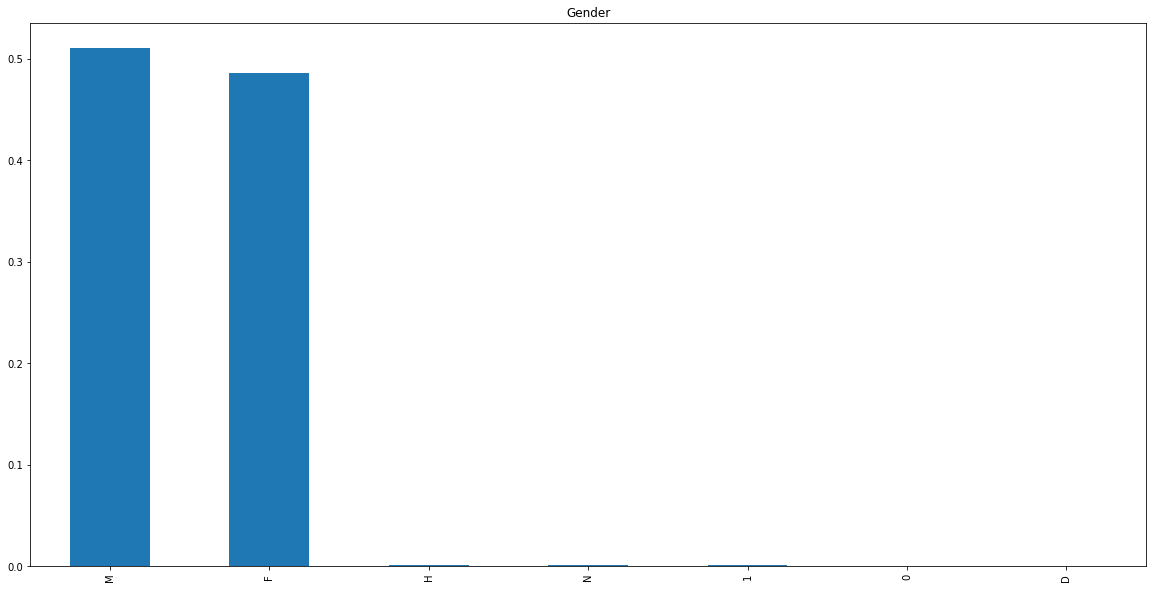

In [81]:
loanData['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.show()

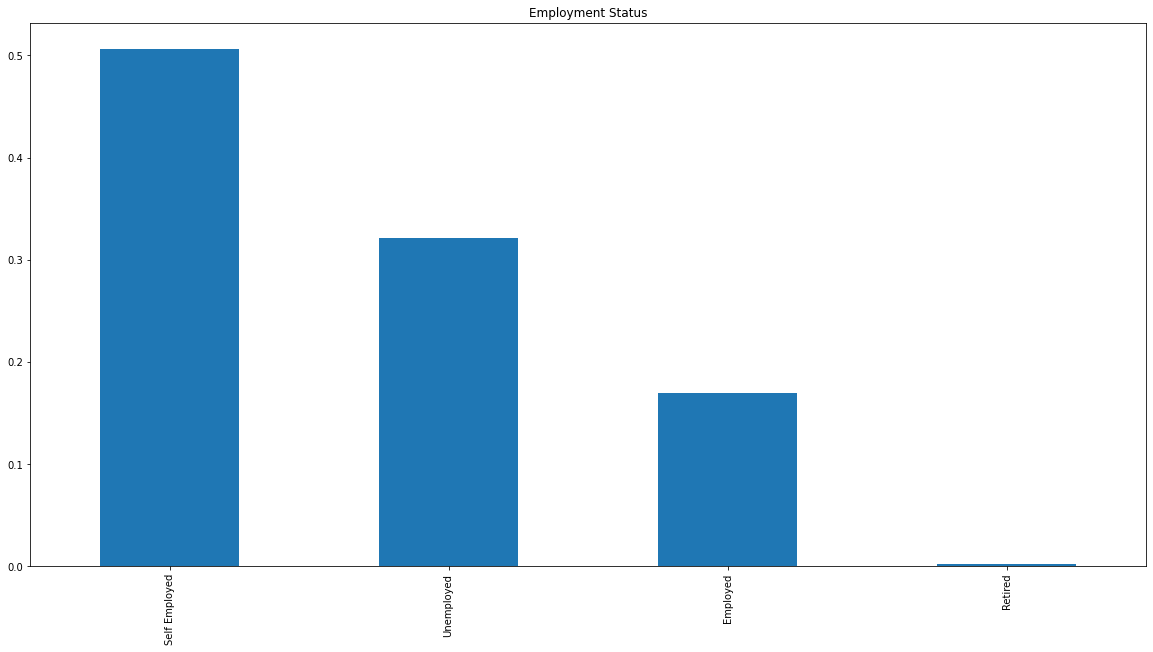

In [82]:
loanData['Employment status'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Employment Status')
plt.show()

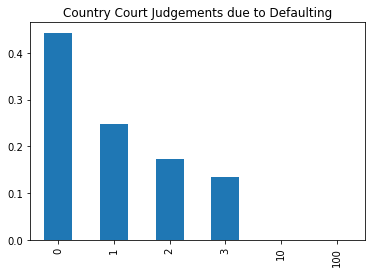

In [83]:
loanData['CCJs'].value_counts(normalize=True).plot.bar( title='Country Court Judgements due to Defaulting')
plt.show()

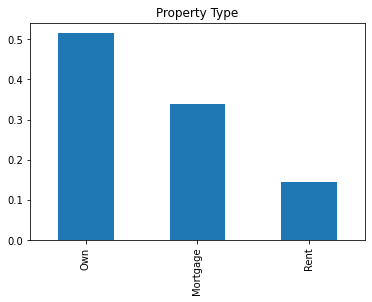

In [84]:
loanData['Own home'].value_counts(normalize=True).plot.bar(title='Property Type')
plt.show()


c:\users\aritra marik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


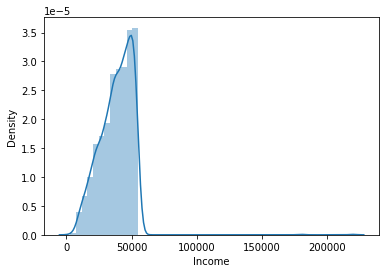

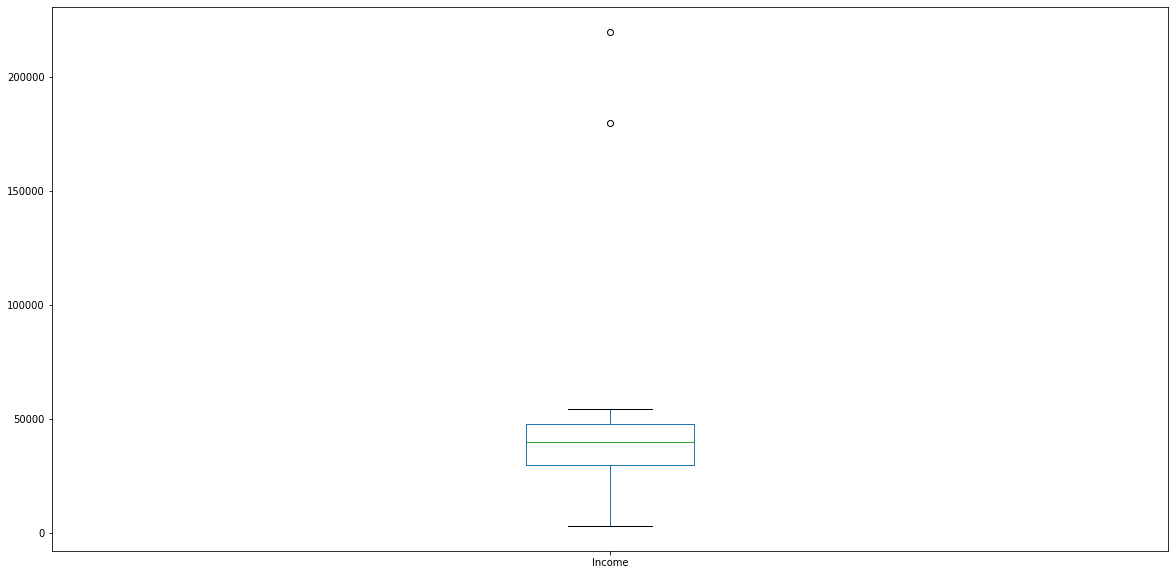

In [85]:
sns.distplot(loanData['Income'])
plt.show()
loanData['Income'].plot.box(figsize=(20,10))
plt.show()

Text(0.5, 0.98, '')

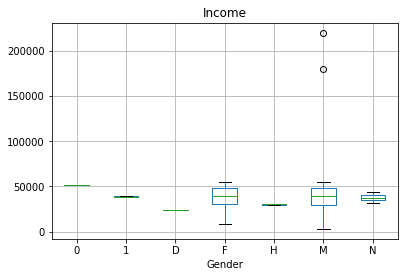

In [86]:
loanData.boxplot(column='Income', by = 'Gender') 
plt.suptitle("")

c:\users\aritra marik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


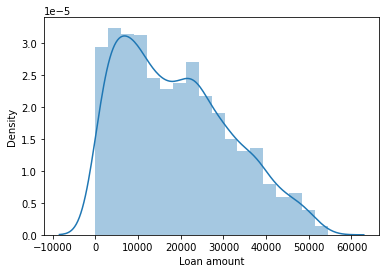

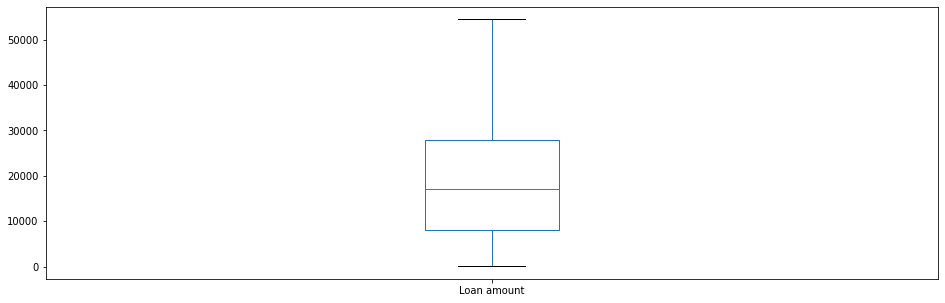

In [87]:
loanData.notna()
sns.distplot(loanData['Loan amount'])
plt.show()
loanData['Loan amount'].plot.box(figsize=(16,5))
plt.show()

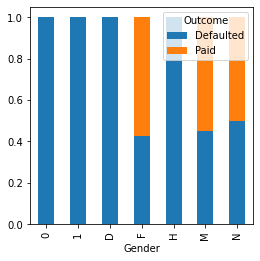

In [88]:
Gender=pd.crosstab(loanData['Gender'],loanData['Outcome'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

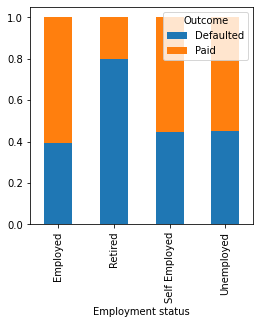

In [89]:
Emp_Status=pd.crosstab(loanData['Employment status'],loanData['Outcome'])
Emp_Status.div(Emp_Status.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

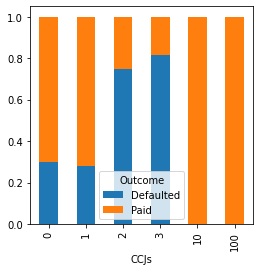

In [90]:
CCJs=pd.crosstab(loanData['CCJs'],loanData['Outcome'])
CCJs.div(CCJs.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

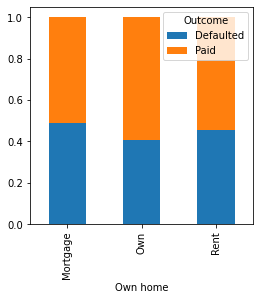

In [91]:
Prop=pd.crosstab(loanData['Own home'],loanData['Outcome'])
Prop.div(Prop.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

<AxesSubplot:xlabel='Outcome'>

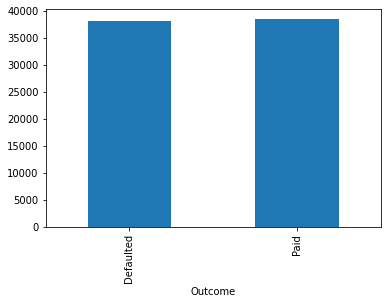

In [92]:
loanData.groupby('Outcome')['Income'].mean().plot.bar()

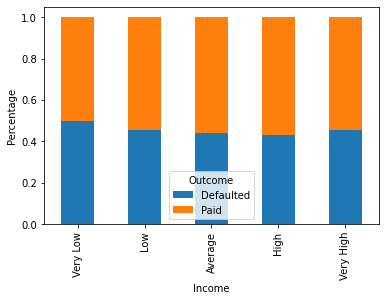

In [93]:
bins = [0, 10000, 20000, 40000, 50000, 60000]
group= ['Very Low','Low', 'Average', 'High','Very High']
loanData['Income_bin'] = pd.cut(loanData['Income'], bins, labels = group)
Income_bin = pd.crosstab(loanData['Income_bin'], loanData['Outcome'])
Income_bin.div(Income_bin.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True)
plt.xlabel('Income')
P = plt.ylabel('Percentage')

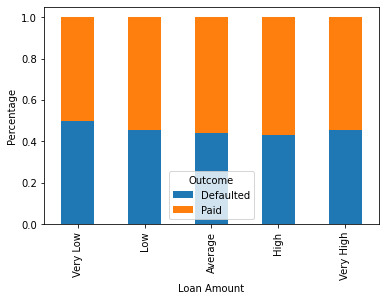

In [94]:
bins = [0,5000, 10000, 20000, 40000, 50000]
group= ['Very Low','Low', 'Average', 'High','Very High']
loanData['Loan amount_bin'] = pd.cut(loanData['Loan amount'], bins, labels = group)
Loan_bin = pd.crosstab(loanData['Loan amount_bin'], loanData['Outcome'])
Income_bin.div(Income_bin.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True)
plt.xlabel('Loan Amount')
P = plt.ylabel('Percentage')

In [95]:
loanData = loanData.drop(['Income_bin','Loan amount_bin'], axis =1)
loanData['Outcome'].replace('Defaulted', 0, inplace = True)
loanData['Outcome'].replace('Paid', 1, inplace = True)

<AxesSubplot:>

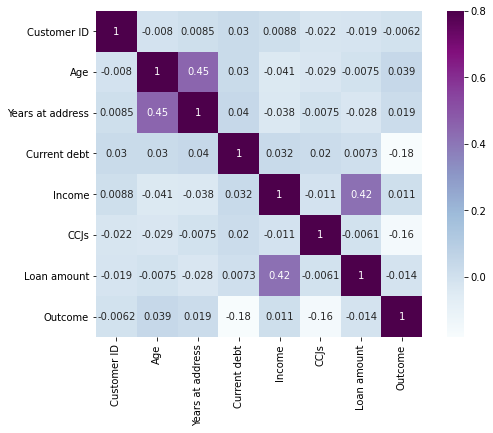

In [96]:
matrix = loanData.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [97]:
loanData.isnull().sum()

Customer ID          0
Fictional Surname    0
Age                  0
Gender               0
Years at address     0
Employment status    0
Country              0
Current debt         0
Postcode             0
Income               0
Own home             0
CCJs                 0
Loan amount          0
Outcome              0
dtype: int64

In [98]:
loanData['Gender'].replace("H","M", inplace = True)
loanData['Gender'].replace("N","M", inplace = True)
loanData['Gender'].replace("1","M", inplace = True)
loanData['Gender'].replace("0","M", inplace = True)


<AxesSubplot:>

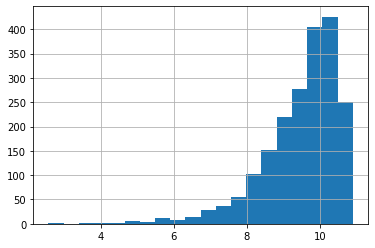

In [99]:
loanData['LoanAmount_log'] = np.log(loanData['Loan amount'])
loanData['LoanAmount_log'].hist(bins=20)

In [100]:
test = loanData.drop('Outcome',1)
loanData = loanData.drop('Customer ID', axis =1)
test = test.drop('Customer ID', 1)

In [101]:
X = loanData.drop('Outcome', 1)
Y = loanData.Outcome

In [102]:
X = pd.get_dummies(X)
loanData = pd.get_dummies(loanData)

In [103]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size=0.3)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [105]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.705

In [106]:
test['LoanAmount_log']=np.log(test['Loan amount'])
test_original = test
test = pd.get_dummies(test)


In [107]:
pred_test = model.predict(test)


In [108]:
data = {'Customer ID':[], 'Outcome': []}
submission = pd.DataFrame(data)

In [109]:
submission['Outcome'] = pred_test

In [110]:
submission['Customer ID'] = test_original['Customer ID']

In [111]:
submission.head()

,Customer ID,Outcome
0,945780,1
1,747989,1
2,790344,1
3,597668,1
4,794971,1


In [113]:
submission['Outcome'].replace(0, 'Defaulted', inplace=True)
submission['Outcome'].replace(1, 'Paid', inplace=True)

In [114]:
pd.DataFrame(submission, columns = ['Customer ID', 'Outcome']).to_csv('Logistic.csv')

In [115]:
from sklearn.model_selection import StratifiedKFold

In [118]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5)
for train_index,test_index in kf.split(X,Y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = Y[train_index],Y[test_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 


c:\users\aritra marik\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 0.7075

2 of kfold 5 
accuracy_score 0.585

3 of kfold 5 
accuracy_score 0.685

4 of kfold 5 
accuracy_score 0.5825

5 of kfold 5 
accuracy_score 0.7075

 Mean Validation Accuracy 0.6535


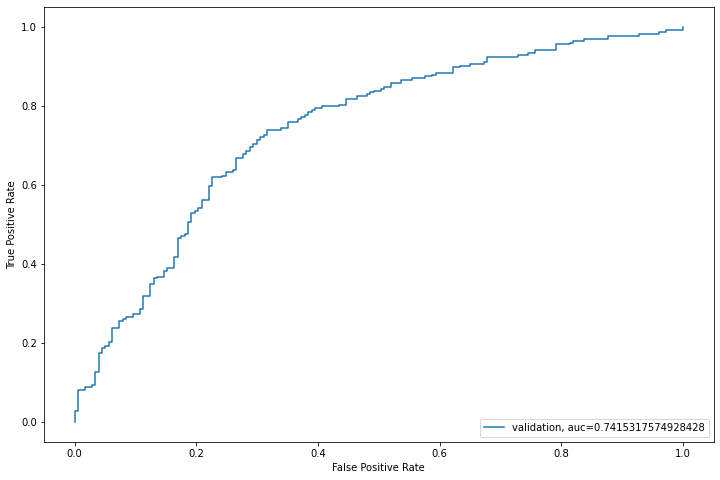

In [119]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc=" +str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [120]:
submission['Outcome'] = pred_test
submission['Customer ID'] = test_original['Customer ID']

In [121]:
submission['Outcome'].replace(0, 'Defaulted', inplace=True)
submission['Outcome'].replace(1, 'Paid', inplace=True)

In [122]:
pd.DataFrame(submission, columns = ['Customer ID', 'Outcome']).to_csv('Logistic.csv')

In [124]:
X = loanData.drop('Outcome',1)
y = loanData.Outcome

In [125]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.73

2 of kfold 5 
accuracy_score 0.6125

3 of kfold 5 
accuracy_score 0.71

4 of kfold 5 
accuracy_score 0.595

5 of kfold 5 
accuracy_score 0.73

 Mean Validation Accuracy 0.6755


In [126]:
submission['Outcome'] = pred_test
submission['Customer ID'] = test_original['Customer ID']

In [127]:
submission['Outcome'].replace(0, 'Defaulted', inplace = True)
submission['Outcome'].replace(1, 'Paid', inplace = True)


In [128]:
pd.DataFrame(submission, columns = ['Customer ID', 'Outcome']).to_csv('Log2.csv')

Decision Tree

In [129]:
from sklearn import tree
i = 1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(X, y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.755

2 of kfold 5 
accuracy_score 0.7025

3 of kfold 5 
accuracy_score 0.75

4 of kfold 5 
accuracy_score 0.71

5 of kfold 5 
accuracy_score 0.7725

 Mean Validation Accuracy 0.738


In [130]:
submission['Outcome']=pred_test
submission['Customer ID']=test_original['Customer ID']

In [132]:
submission['Outcome'].replace(0, 'Defaulted', inplace=True)
submission['Outcome'].replace(1, 'Paid', inplace=True)

In [133]:
pd.DataFrame(submission, columns = ['Customer ID', 'Outcome']).to_csv('DecisionTree.csv')

In [134]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.5925

2 of kfold 5 
accuracy_score 0.5875

3 of kfold 5 
accuracy_score 0.615

4 of kfold 5 
accuracy_score 0.5825

5 of kfold 5 
accuracy_score 0.665

 Mean Validation Accuracy 0.6085


In [136]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)
grid_search.fit(x_train,y_train)
GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})
grid_search.best_estimator_
RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.56

2 of kfold 5 
accuracy_score 0.56

3 of kfold 5 
accuracy_score 0.56

4 of kfold 5 
accuracy_score 0.5575

5 of kfold 5 
accuracy_score 0.575

 Mean Validation Accuracy 0.5625


In [137]:
submission['Outcome'] = pred_test
submission['Customer ID'] = test_original['Customer ID']

In [138]:
submission['Outcome'].replace(0, 'Defaulted', inplace=True)
submission['Outcome'].replace(1, 'Paid', inplace=True)

In [139]:
pd.DataFrame(submission, columns = ['Customer ID', 'Outcome']).to_csv('RandomForest.csv')

In [142]:
# importances=pd.Series(model.feature_importances_, index=X.columns)
# importances.plot(kind='barh', figsize=(20,10))